✔ Trains the XOR network with six different optimizers.

✔ Tracks loss over 2000 epochs.

✔ Plots loss curves to compare optimizer performance.

In [28]:
import torch

import torch.nn as nn

import torch.optim as optim

import matplotlib.pyplot as plt

In [29]:
# Define XOR dataset

X = torch.tensor([[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]], dtype= torch.float32)

y = torch.tensor([[0.0],[1.0],[1.0],[0.0]], dtype=torch.float32)

In [30]:
# Define XOR Neural Network with 1 hidden layer

class XORNetwork(nn.Module):

    def __init__(self):
        super(XORNetwork, self).__init__()

        self.fc1 = nn.Linear(2,4) # Input to Hidden Layer (4 neurons)

        self.fc2 = nn.Linear(4,1) # Hidden Layer to Output


    def forward(self,x):

        x = torch.relu(self.fc1(x)) # ReLU activation for hidden layer

        x = torch.sigmoid(self.fc2(x))  # Sigmoid activation for output layer

        return x

In [31]:
# Define different optimizers

optimizers ={

"SGD" : lambda params: optim.SGD(params, lr=0.1),

"Momentum" : lambda params: optim.SGD(params, lr=0.1, momentum=0.9),

"RMSprop" : lambda params: optim.RMSprop(params, lr=0.1),

"Adagrad" : lambda params: optim.Adagrad(params, lr=0.1),

"Adam" : lambda params: optim.Adam(params, lr=0.1),

"L-BFGS" : lambda params: optim.LBFGS(params, max_iter=100)

}

In [32]:
# Train and compare each optimizer

loss_histories = {}

loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for classification

In [33]:
for opt_name,opt_func in optimizers.items():

    model = XORNetwork()

    optimizer = opt_func(model.parameters())

    loss_history = []

    epochs = 2000


    for epoch in range(epochs):

        def closure():

            optimizer.zero_grad()

            output = model(X)

            loss = loss_fn(output, y)

            loss.backward()

            return loss
        
        if opt_name == "L-BFGS":

            optimizer.step(closure)

            loss = closure()

        else:

            optimizer.zero_grad()

            predictions = model(X)

            loss = loss_fn(predictions , y)

            loss.backward()

            optimizer.step()

        loss_history.append(loss.item())

    
    loss_histories[opt_name] = loss_history

    print(f'{opt_name} - Final Loss {loss.item():.5f}')

SGD - Final Loss 0.01552
Momentum - Final Loss 0.69315
RMSprop - Final Loss 0.69315
Adagrad - Final Loss 0.00587
Adam - Final Loss 0.69315
L-BFGS - Final Loss 0.00000


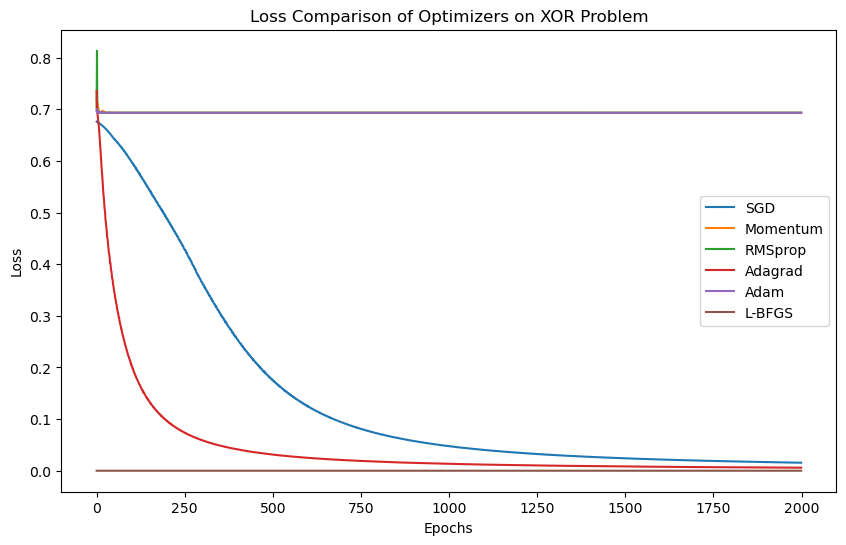

In [34]:
# Plot loss curves

plt.figure(figsize=(10,6))

for opt_name, loss_history in loss_histories.items():

    plt.plot(loss_history, label = opt_name)

    plt.xlabel("Epochs")

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title("Loss Comparison of Optimizers on XOR Problem")

plt.legend()

plt.show()

